In [1]:
import pathlib

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import IPython
from IPython.core.display import display

import librosa
import librosa.display

# our own stuff
from ct_utils import analog

In [2]:
# this is required for the `Output` widgets to work properly
%matplotlib inline

Follow through the *notebook* and answer the 5 questions raised (highligted in <font color='red'>red</font>).

A couple of off-topic remarks:
* Seemingly, the performance of the app is better in [Chrome](https://www.google.com/chrome/), though [Firefox](https://www.mozilla.org/en-US/firefox/) is also fine.
* Before playing any recording, especially if you are using earphones, please make sure the volume is not too loud.
* For answering the questions, you don't need to hear the full song every time. It is usually enough to play the first 5-10 seconds.
* When adjusting the sliders below, you usually need to wait for a few seconds for the app to update and some *flickering* might occur. Please be patient. Bear in mind that this is running *in the cloud* and, sometimes, modulation/demodulation of a high-quality audio recording is being performed for you.

# Introduction

Please check the [slides of the course](https://manuvazquez.github.io/assets/communications_theory/slides/analog_modulations.pdf) for this module. Extra background information can be found in the slides for the [course introduction](https://manuvazquez.github.io/assets/communications_theory/slides/introduction.pdf), when talking about *Analog vs Digital communications systems*

# Amplitude Modulation (conventional AM)

An amplitude modulation is a kind of *linear* or *amplitude* (**analog**) modulation, i.e., the information signal is embedded in the amplitude of the signal (meaning the frequency and phase of the *carrier signal* stay constant). If we denote the information signal (also referred to as _modulat**ing**_ signal) by $x(t)$, then the _modulat**ed**_ signal is given by

$$
\large
y(t)
=
\left( 
    A_c +
    A_m
    x(t)
\right)
\cos (w_ct)
$$
where
* both $A_c$ and $A_m$ are (adjustable) modulation parameters 
* $w_c$ is the carrier frequency

The above signal can be expressed in a different way

$$
\large
y(t)
=
\left( 
    A_c +
    \frac{A_c}{A_c}
    A_m
    x(t)
\right)
\cos (w_ct)
=
A_c
\left(
    1 + mx(t)
\right)
\cos (w_ct)
$$
by defining the **modulation index**

$$
\large
m
=
\frac{A_m}{A_c}
$$
.

# Demodulation

If the signal is *normalized* (i.e., $|x(t)| \le 1$), looking at the above equation, demodulation is very easy if

$$
    \large
    A_c
    \left(
        1 + mx(t)
    \right)
    \ge
    0
$$

i.e., if the term multiplying the cosine is (at every time instant) non-negative. The reason is that whatever *positive* signal multiplies a rapidly varying cosine constitutes its so-called upper [envelope](https://en.wikipedia.org/wiki/Envelope_(waves)) (a smooth signal that outlines the extremes of a sinusoid), and simple/cheap/efficient hardware is available to extract the latter. Now, if the signal is at some point negative, then it cannot be recovered as the envelope of the signal. In our particular case, what do we need for the condition
$
    A_c
    \left(
        1 + mx(t)
    \right)
    \ge
    0
$
to hold? Above we have guaranteed that $|x(t)| \le 1$. Let us also assume that $A_c \ge 0$ (no need to go into details, but this is not a problem). Then,  we just need to choose $m$ so that $mx(t) \ge -1$, i.e., $ 0 < m \le 1$.

So, in summary, if the modulation index, $m$ is between $0$ and $1$, then the envelope of the modulated signal (easy to extract) is exactly
$
    A_c
    \left(
        1 + mx(t)
    \right)
    \ge
    0
$, and from the latter one can solve for $x(t)$ to recover the information signal. If $m>1$, then the envelope of the signal doesn't match anymore
$
    A_c
    \left(
        1 + mx(t)
    \right)
    \ge
    0
$
and the signal recovered with this envelope-based method is not correct. This is called **overmodulation**.

# An audio signal

We load a piece of the song *Reverie* by [\_ghost](http://ccmixter.org/files/_ghost/25389) (downloaded from [ccMixter](http://ccmixter.org/) under [Creative Commons licence](https://creativecommons.org/licenses/by/3.0/)).

In [3]:
# filename = pathlib.Path('_ghost_-_Reverie_(small_theme).mp3')
filename = pathlib.Path('_ghost_-_Reverie_(small_theme).wav')
assert filename.exists()

In [4]:
signal, sampling_rate = librosa.load(filename)
# signal.shape

In [5]:
# a normalized version of the signal
normalized_signal, normalization_const = analog.normalize(signal, return_normalization_constant=True)

In [6]:
# a scaled up one
amplified_signal = signal * 11

In [7]:
# time axis
t = np.arange(len(signal)) / sampling_rate

In [8]:
IPython.display.display(IPython.display.Audio(signal, rate=sampling_rate))

In [9]:
# Parameters
w_c = 2 * np.pi * 1_000
A_m = 1.
A_c = 2.

In [10]:
def make_plot_and_player(signal: np.ndarray) -> list:
    
    # modulation/demodulation
    am = analog.AmplitudeModulation(Am=A_m, Ac=A_c, carrier_freq=w_c)
    modulated_signal, *_ = am.modulate(t, signal)
    demodulated_signal = am.demodulate(modulated_signal)
    
    res = []

    # a `matplotlib` figure embedded in an `Output` widget
    figure_size = (6,8)
    output = widgets.Output()
    with output:
        fig, ax = plt.subplots(1, 1, figsize=figure_size)
    ax.plot(t, signal);
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.resizable = False
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    res.append(output)

    # an audio widget
    output = widgets.Output()
    with output:
        IPython.display.display(IPython.display.Audio(demodulated_signal, rate=sampling_rate))
    res.append(output)
    
    return res

**<font color='red'>Q1.</font>** Two scaled versions of the signal are modulated and, afterwards, *properly* demodulated using the above algebra. Look at the pictures noting the scale of the vertical axis. Can you guess which one is going to sound OK? If not sure, just play both of them for a few seconds. Which one sounds fine? Why not so much the other? Assume each one of the signals below constitutes the exact $x(t)$ to be transformed using the above equation.

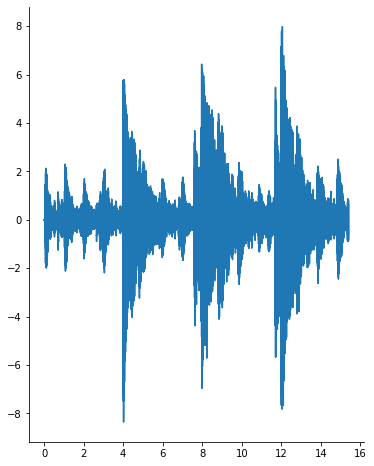

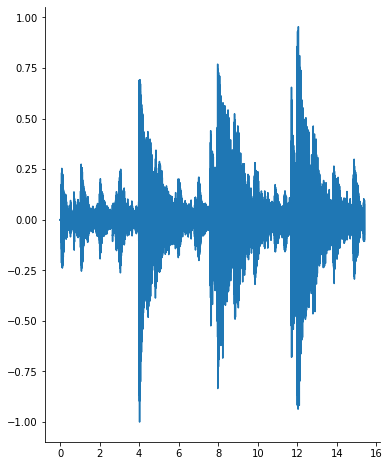

In [11]:
widgets.HBox([
    widgets.VBox(make_plot_and_player(amplified_signal)),
    widgets.VBox(make_plot_and_player(normalized_signal))])

# Overmodulation

In [12]:
# an interval specifying a small piece of the signal
interval_of_interest = range(100_000,100_200)

When you adjust one of the slides, please wait a few seconds (more or less depending on the *cloud* servers load) for the browser to refresh (most likely, it will flicker **twice**).

In [13]:
common_properties = {'min': 0.1, 'max': 50.}
Am_slider_widget = widgets.FloatSlider(**common_properties, value=1., description='$A_m$')
Ac_slider_widget = widgets.FloatSlider(**common_properties, value=2, description='$A_c$')
ui = widgets.VBox([Am_slider_widget, Ac_slider_widget])

def f(Am: float, Ac: float):
    
    # in order to try and avoid the "RuntimeWarning: More than 20 figures have been opened. Figures...
    try:
        plt.close(fig)
    except UnboundLocalError:
        pass
    
    am = analog.AmplitudeModulation(Am=Am, Ac=Ac, carrier_freq=w_c)
    modulated_signal, envelope, cosine_factor = am.modulate(t, normalized_signal)
    demodulated_signal = am.demodulate(modulated_signal)
    
#     plt.cla()
    
    # figure
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    ax.plot(
        t[interval_of_interest], normalized_signal[interval_of_interest], label='information (modulating) signal')
    ax.plot(
        t[interval_of_interest], demodulated_signal[interval_of_interest], label='demodulated signal',
        marker='P', markevery=5)
#     ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize='x-large')
    ax.legend(loc='upper left',fontsize='x-large')
    player = IPython.display.Audio(demodulated_signal, rate=sampling_rate)
    fig.canvas.toolbar_visible = False
    fig.canvas.footer_visible = False
    fig.canvas.header_visible = False
    fig.canvas.resizable = False
    
#     print(f'm = {am.m}')
    
    display(IPython.display.Audio(demodulated_signal, rate=sampling_rate))

out = widgets.interactive_output(f, {'Am': Am_slider_widget, 'Ac': Ac_slider_widget})
IPython.display.display(ui, out)

Output()

Try different values of the parameteres $A_m$ and $A_c$ and compare the information and demodulated signals. You can also play the demodulated signal by clicking the corresponding button below.

**<font color='red'>Q2.</font>** Provide values for $A_m$ and $A_c$ that cause overmodulation. What do you notice in the plot? Why doesn't it affect the whole signal?

**<font color='red'>Q3.</font>** Test the effects of overmodulation on our ears. Can you pick a pair of values for $A_m$ and $A_c$ such that overmodulation happens but doesn't cause a noticeable degradation on the *perceived* sound quality? Above which (approximate) value of the modulation index, $m$, do you start noticing glitches in the audio?

# Noise resilience

In [14]:
# power of the signal
P_s = (np.abs(normalized_signal)**2).mean()

In [15]:
# the modulated signal is always the same
am = analog.AmplitudeModulation(Am=A_m, Ac=A_c, carrier_freq=w_c)
modulated_signal, envelope, cosine_factor = am.modulate(t, normalized_signal)

Below you can see the effect on the demodulated signal when noise is added to the modulated one. In particular, you can adjust the signal-to-noise ratio (SNR) **in dBs** and look and hear the result.

In [16]:
SNR_slider_widget = widgets.FloatSlider(min=5., max=60., value=15., description='SNR')

print_output = widgets.Output()

def f(SNR: float):
    
    # in order to try and avoid the "RuntimeWarning: More than 20 figures have been opened. Figures...
    try:
        plt.close(fig)
    except UnboundLocalError:
        pass
    
    global print_output
    
    noise_variance = P_s / 10**(SNR / 10.)
    noise = np.random.randn(*normalized_signal.shape) * np.sqrt(noise_variance)

    demodulated_signal = am.demodulate(modulated_signal + noise)
    
    # figure
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    ax.plot(
        t[interval_of_interest], normalized_signal[interval_of_interest], label='information (modulating) signal')
    ax.plot(
        t[interval_of_interest], demodulated_signal[interval_of_interest], label='demodulated signal',
        marker='P', markevery=5)
    ax.legend(loc='upper left',fontsize='x-large')
    player = IPython.display.Audio(demodulated_signal, rate=sampling_rate)
    fig.canvas.toolbar_visible = False
    fig.canvas.footer_visible = False
    fig.canvas.header_visible = False
    fig.canvas.resizable = False
    
    print_output.clear_output()
    
    with print_output:
        print(f'noise variance = {noise_variance}')
    display(IPython.display.Audio(demodulated_signal, rate=sampling_rate))

out = widgets.interactive_output(f, {'SNR': SNR_slider_widget})
IPython.display.display(widgets.VBox([SNR_slider_widget, print_output]), out)

Output()

**<font color='red'>Q4.</font>** Below which value of the SNR is the sound not *perceived* as sharp (clear) anymore? $10$ dBs is usually considered a *pretty good* SNR in high quality radio (see, e.g., the last paragraphs in [these notes](https://www.electronics-notes.com/articles/radio/radio-receiver-sensitivity/signal-to-noise-ratio-s-n-snr-formula.php)). According to that, is AM noise-resilient or not?
<!-- Notice we are not performing any kind of de-noising, which we should-->

**<font color='red'>Q5.</font>** What is the power of the signal for an SNR of about $20$ dBs?